# Factor Analysis
What is FA:
* A method to represent observed variables as a linear combination of factors (unobserved variables|| latent variables) and error items. The goodness of the representation is expressed by cummulative variance sum for the factors.

How does FA work:
1. Factor Extraction: 

    In this step, the number of factors and approach for extraction selected using variance partitioning methods such as PCA and CFA (common factor analysis).
2. Factor Rotation: 

    In this step, rotation tries to convert factors into uncorrelated factors — the main goal of this step to **improve the overall interpretability**. There are lots of rotation methods that are available such as: `Varimax rotation method, Quartimax rotation method, and Promax rotation method.`

Applying Assumptions:
1. There are no outliers in data.
2. Sample size should be greater than the factor.
3. There should not be perfect multicollinearity(完美的多重共线性).
4. There should not be homoscedasticity between the variables(没有齐次性).

Types:
- Exploratory FA: Its basic assumption is that any observed variable is directly associated with any factor.
- Confirmatory FA: Its basic assumption is that each factor is associated with a particular set of observed variables. 

Terminology:
- Factor loadings: A matrix of shape: (#observed variables,#factors), which shows the correlation between them,
- Egien values: A vector of Variance explained each factor from the total variance, which has shape (#factors,)
- Communalities: sum of the squared loadings for each variable

FA vs PCA
- PCA components explain the maximum amount of variance while FA explains the covariance in data.
- PCA components are fully orthogonal to each other whereas FA does not require factors to be orthogonal.
- PCA component is a linear combination of the observed variable while in FA, the observed variables are linear combinations of the unobserved variable or factor.
- PCA components are uninterpretable. In FA, underlying factors are labelable and interpretable.
- PCA is a kind of dimensionality reduction method whereas FA is the latent variable method. --> PCA is a type of FA.

Pros and Cons
* Pros:
    - It compresses the observed variables into a few unobserved variables, which benefits the analysis.

* Cons:
    - Results of factor analysis are controversial. Its interpretations can be debatable because more than one interpretation can be made of the same data factors. The naming of factors requires domain knowledge.

References: https://www.datacamp.com/community/tutorials/introduction-factor-analysis


In [33]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv("Dataset/bfi.csv")

In [70]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [71]:
df.drop(['gender', 'education', 'age','Unnamed: 0'],axis=1,inplace=True)

In [72]:
df.dropna(inplace=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  
 22  

In [74]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


## Adequacy Test
Before we perform factor analysis, we need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:
- Bartlett's Test
- Kaiser-Meyer-Olkin(KMO) Test

**Bartlett's Test:** Checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, we should not employ a factor analysis.

**KMO Test:** KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [75]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [76]:
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18170.966350869243, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

In [77]:
from factor_analyzer.factor_analyzer import calculate_kmo

In [78]:
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8485397221949222

The overall KMO for our data is 0.84, which is excellent. This value indicates that you can proceed with your planned factor analysis.

## Choosing the Number of Factors

- Kaiser Criterion: 

    Kaiser criterion is an analytical approach, which is based on the more significant proportion of variance explained by factor will be selected. 
    
    The eigenvalue is a good criterion for determining the number of factors.Generally, an **eigenvalue greater than 1** will be considered as selection criteria for the feature. We can use the Scree Plot to have a direct view.
    
- AIC,BIC

In [79]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None)
fa.fit(df, 25)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [80]:
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

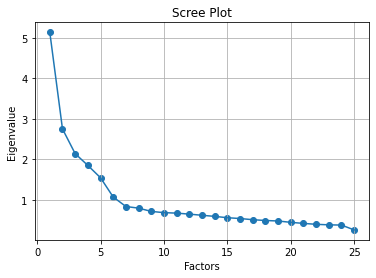

In [81]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

We can see only for 6-factors eigenvalues are greater than one. It means we need to choose only 6 factors (or unobserved variables).

In [82]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation='varimax',n_factors=6)
fa.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [85]:
ldf=pd.DataFrame(fa.loadings_)
ldf.columns=['Factor1','Factor2','Factor3','Factor4','Factor5','Factor6']
ldf.index=df.columns
ldf.head(25)

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


In [87]:
# Get variance of each factors
vfa=pd.DataFrame(fa.get_factor_variance())
vfa.columns=['Factor1','Factor2','Factor3','Factor4','Factor5','Factor6']
vfa.index=['SS Loadings','Proportion Var','Cumulative Var']
vfa.head(25)

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
SS Loadings,2.726989,2.602239,2.073471,1.713499,1.504831,0.630297
Proportion Var,0.109080,0.104090,0.082939,0.068540,0.060193,0.025212
Cumulative Var,0.109080,0.213169,0.296108,0.364648,0.424841,0.450053


In [89]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation='varimax',n_factors=5)
fa.fit(df)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [90]:
ldf=pd.DataFrame(fa.loadings_)
ldf.columns=['Factor1','Factor2','Factor3','Factor4','Factor5']
ldf.index=df.columns
ldf.head(25)

,Factor1,Factor2,Factor3,Factor4,Factor5
A1,0.111126,0.040465,0.022798,-0.428166,-0.077931
A2,0.029588,0.213716,0.139037,0.626946,0.062139
A3,0.009357,0.317848,0.109331,0.650743,0.056196
A4,-0.066476,0.204566,0.230584,0.435624,-0.112700
A5,-0.122113,0.393034,0.087869,0.537087,0.066708
C1,0.010416,0.070184,0.545824,0.038878,0.209584
C2,0.089574,0.033270,0.648731,0.102782,0.115434
C3,-0.030855,0.023907,0.557036,0.111578,-0.005183
C4,0.240410,-0.064984,-0.633806,-0.037498,-0.107535
C5,0.290318,-0.176395,-0.562467,-0.047525,0.036822


...
- Factor 4 has high factor loadings for A1,A2,A3,A4, and A5 (Agreeableness)
- Factor 5 has high factor loadings for O1,O2,O3,O4, and O5 (Opennness)

In [91]:
# Get variance of each factors
vfa=pd.DataFrame(fa.get_factor_variance())
vfa.columns=['Factor1','Factor2','Factor3','Factor4','Factor5']
vfa.index=['SS Loadings','Proportion Var','Cumulative Var']
vfa.head(25)

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,2.709633,2.473090,2.041106,1.844498,1.522153
Proportion Var,0.108385,0.098924,0.081644,0.073780,0.060886
Cumulative Var,0.108385,0.207309,0.288953,0.362733,0.423619


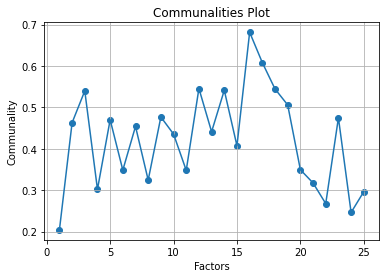

In [96]:
tmp=fa.get_communalities()
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),tmp)
plt.plot(range(1,df.shape[1]+1),tmp)
plt.title('Communalities Plot')
plt.xlabel('Factors')
plt.ylabel('Communality')
plt.grid()
plt.show()